In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [43]:
import seaborn as sns

In [44]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [45]:
movies = pd.read_csv('tmdb_5000_movies.csv')
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


Cборы 10 самых высокобюджетных фильмов. Столбчатая диаграмма. В визуализации используются столбцы title, revenue, budget. Цель: посмотреть, были ли высокобюджетные провалы.

In [46]:
movies_budget = movies.sort_values('budget', ascending=False).head(10)
#movies_budget

In [47]:
df = movies_budget[['title'] + ['revenue'] + ['budget']]
df.set_index(['title'], inplace = True)
df.head(10)

,revenue,budget
title,,
Pirates of the Caribbean: On Stranger Tides,1045713802,380000000
Pirates of the Caribbean: At World's End,961000000,300000000
Avengers: Age of Ultron,1405403694,280000000
Superman Returns,391081192,270000000
John Carter,284139100,260000000
Tangled,591794936,260000000
Spider-Man 3,890871626,258000000
The Lone Ranger,89289910,255000000
X-Men: Days of Future Past,747862775,250000000


Text(0.5, 1.0, 'Top 10 movies by budget')

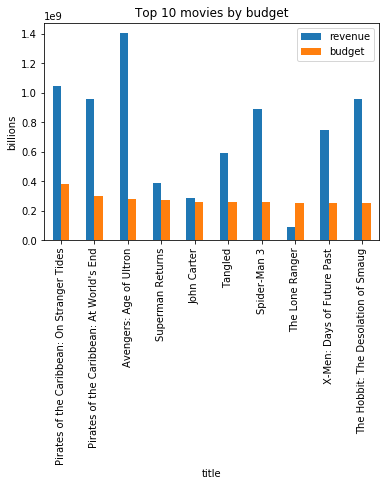

In [48]:
df.plot(kind='bar', rot=90)
plt.xlabel('title')
plt.ylabel('billions')
plt.title('Top 10 movies by budget')

Точечный график. Цель: посмотреть, есть ли зависимость между средний рейтингом фильма и количеством проголосовавших. В визуализации используются столбцы vote_average, vote_count. 

C:\Users\Kabanov\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



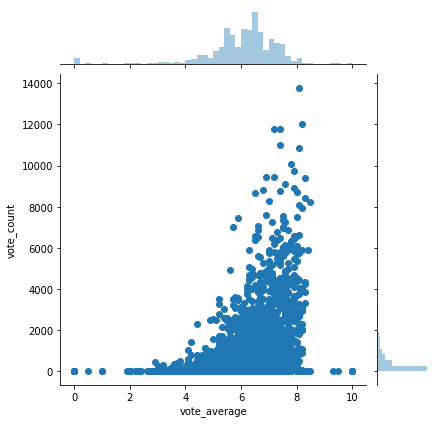

In [49]:
sns.jointplot(x='vote_average', y='vote_count', 
              data=movies, kind='scatter')

Сборы неанглоязычных фильмов с 1997 года. Heat map. В визуализации используются столбцы year, original_language, revenue. Цель: посмотреть наиболее успешные языки.

In [50]:
def release_year(row):
    """Получение года выпуска фильма из столбца release_date строки row"""
    try:
        release_date_datetime = datetime.strptime( str(row['release_date']), '%Y-%m-%d' )
    except ValueError:
        return np.NaN
    return release_date_datetime.year

In [51]:
movies['year'] = movies.apply(release_year, axis=1)
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0


In [52]:
#отбираем original_language с количеством фильмов более 10 (и не английский)
a = movies['original_language'].value_counts()[(10 < movies['original_language'].value_counts()) & (movies['original_language'].value_counts() < 1000)].index
original_languages = []
for i in range(len(a)):
    original_languages.append(a[i])
print(original_languages)

['fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru']


In [53]:
def release_year(row):
    """Получение года выпуска фильма из столбца release_date строки row"""
    try:
        release_date_datetime = datetime.strptime( str(row['release_date']), '%Y-%m-%d' )
    except ValueError:
        return np.NaN
    return release_date_datetime.year

In [54]:
movies['year'] = movies.apply(release_year, axis=1)
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0


In [55]:
# для наглядности графика оставляем только года с 1997 г.
filtered_languages = movies[ (movies['original_language'].isin(original_languages)) & (movies['year']>1996)] 
filtered_languages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 97 to 4792
Data columns (total 21 columns):
budget                  214 non-null int64
genres                  214 non-null object
homepage                73 non-null object
id                      214 non-null int64
keywords                214 non-null object
original_language       214 non-null object
original_title          214 non-null object
overview                212 non-null object
popularity              214 non-null float64
production_companies    214 non-null object
production_countries    214 non-null object
release_date            214 non-null object
revenue                 214 non-null int64
runtime                 213 non-null float64
spoken_languages        214 non-null object
status                  214 non-null object
tagline                 120 non-null object
title                   214 non-null object
vote_average            214 non-null float64
vote_count              214 non-null int64
year           

In [56]:
language_year_revenue = filtered_languages.pivot_table(
                        index='year', 
                        columns='original_language', 
                        values='revenue', 
                        aggfunc=sum).fillna(0).applymap(float)

language_year_revenue

original_language,cn,de,es,fr,hi,it,ja,ko,ru,zh
year,,,,,,,,,,
1997.0,18814720.0,0.0,0.0,0.0,0.0,0.0,159474308.0,0.0,0.0,0.0
1998.0,0.0,7267585.0,0.0,0.0,528972.0,0.0,0.0,0.0,0.0,0.0
1999.0,0.0,0.0,0.0,66976317.0,0.0,0.0,10037390.0,0.0,0.0,0.0
2000.0,0.0,3003296.0,20908467.0,0.0,623791.0,103.0,83661275.0,0.0,0.0,213525736.0
2001.0,42776760.0,0.0,33616692.0,194139034.0,0.0,0.0,274925095.0,0.0,0.0,0.0
2002.0,0.0,0.0,146402.0,3898591.0,0.0,0.0,0.0,0.0,0.0,177394432.0
2003.0,0.0,79384880.0,0.0,4910018.0,0.0,0.0,0.0,14980005.0,0.0,0.0
2004.0,100914445.0,92180910.0,38535221.0,9584131.0,29385320.0,0.0,234710455.0,15.0,32000000.0,112135257.0
2005.0,0.0,0.0,0.0,147120403.0,0.0,0.0,0.0,23803308.0,0.0,0.0


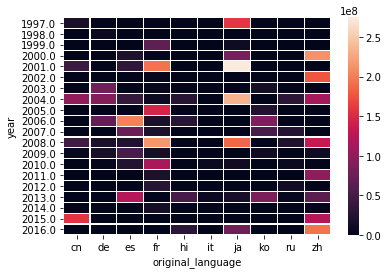

In [57]:
sns.heatmap(language_year_revenue, annot=False, 
            linewidths=0.1)

Динамика общих сборов и бюджетов фильмов. Линейный график. В визуализации используются столбцы year, budget, revenue. Исключаем 2017 год, так как по нему revenue = 0.

In [58]:
movies2016 = movies[ movies.year != 2017 ]
movies2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 21 columns):
budget                  4802 non-null int64
genres                  4802 non-null object
homepage                1711 non-null object
id                      4802 non-null int64
keywords                4802 non-null object
original_language       4802 non-null object
original_title          4802 non-null object
overview                4799 non-null object
popularity              4802 non-null float64
production_companies    4802 non-null object
production_countries    4802 non-null object
release_date            4801 non-null object
revenue                 4802 non-null int64
runtime                 4800 non-null float64
spoken_languages        4802 non-null object
status                  4802 non-null object
tagline                 3958 non-null object
title                   4802 non-null object
vote_average            4802 non-null float64
vote_count              4802 non-null 

In [59]:
revenue_years_movies = movies2016.groupby('year')[['revenue']].sum()
revenue_years_movies.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 89 entries, 1916.0 to 2016.0
Data columns (total 1 columns):
revenue    89 non-null int64
dtypes: int64(1)
memory usage: 1.4 KB


In [60]:
budget_years_movies = movies2016.groupby('year')[['budget']].sum()
budget_years_movies.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 89 entries, 1916.0 to 2016.0
Data columns (total 1 columns):
budget    89 non-null int64
dtypes: int64(1)
memory usage: 1.4 KB


In [61]:
years_df = revenue_years_movies.join(budget_years_movies)
years_df.columns = ['Total_box_office', 'Total_budget']

In [62]:
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Total_box_office,
    name='Total box office'
)

trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Total_budget,
    name='Total budget'
)
  
data = [trace0, trace1]
layout = {'title': 'Statistics of movies'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Box plot. Средние рейтинги в зависимости от года выпуска. Цель: проверить теорию, что с ростом года выпуска фильма его средний рейтинг становится ниже. Для наглядности берем фильмы с 1959 г. В визуализации используются столбцы year, vote_average.

In [63]:
years = list(range(1959,2017))

In [64]:
data = []

for year in years:
    data.append(
        go.Box(y=movies[movies.year==year].vote_average, 
               name=year)
    )
iplot(data, show_link = False)

Bubble chart. Популярность, рейтинг и сборы фильмов на неанглийском языке. В визуализации используются столбцы revenue, vote_average, popularity, original_language.

In [65]:
filtered_languages1 = movies[ movies['original_language'].isin(original_languages)] 
filtered_languages1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 97 to 4798
Data columns (total 21 columns):
budget                  239 non-null int64
genres                  239 non-null object
homepage                76 non-null object
id                      239 non-null int64
keywords                239 non-null object
original_language       239 non-null object
original_title          239 non-null object
overview                237 non-null object
popularity              239 non-null float64
production_companies    239 non-null object
production_countries    239 non-null object
release_date            239 non-null object
revenue                 239 non-null int64
runtime                 238 non-null float64
spoken_languages        239 non-null object
status                  239 non-null object
tagline                 140 non-null object
title                   239 non-null object
vote_average            239 non-null float64
vote_count              239 non-null int64
year           

In [66]:
vote_average_popularity_languages = filtered_languages1.groupby('original_language')[['vote_average', 'popularity']].mean()
revenues_languages = filtered_languages1.groupby('original_language')[['revenue']].sum()

languages_df = vote_average_popularity_languages.join(revenues_languages)
    
languages_df.sort_values(by='revenue').head(10)

,vote_average,popularity,revenue
original_language,,,
it,7.028571,17.818268,42412911
ru,6.354545,7.567724,104610810
hi,6.010526,2.994144,141497385
ko,6.672727,19.488720,278920936
de,6.325926,10.151382,376971444
cn,6.500000,10.631343,404881870
es,6.659375,13.330804,596869710
fr,6.430000,10.299542,872305944
ja,7.050000,25.663788,1056462649


In [67]:
trace0 = go.Scatter(
    x=languages_df.popularity,
    y=languages_df.vote_average,
    mode = 'markers+text',
    text = languages_df.index,
    textposition='bottom center',
    marker = dict(
        size = 1/10000000*languages_df.revenue,
        color = [
            'aqua', 'azure', 'salmon', 'lightgreen',
            'lavender', 'lightblue', 'pink', 'beige',
            'ivory', 'wheat'
        ]
    )
)

data = [trace0]
layout = {
    'title': 'Statistics of movies',
    'xaxis': {'title': 'popularity'},
    'yaxis': {'title': 'vote_average'}
}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)